In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# supress error
pd.options.mode.chained_assignment = None

# load data

In [2]:
# importing data and reading data from csv file
# entries do have whitespace at before chars --> remove them with skipinitialspace
# @Tina wir haben zwei Möglichkeiten, mit den Fragezeichen umzugehen: entweder wir nehmen sie hier mit na_values= ? raus (ersetzen sie durch Nan) oder zeigen wie weiter unten auf, dass es Fragezeichen gibt und ersetzen sie dann
data = pd.read_csv('data/adult.csv', header = None,skipinitialspace=True, na_values='?')
# name columns
data.columns = ['age', 'workclass', "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income" ]
# show dataset
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# describe dataset

In [3]:
# 32561 rows, 15 columns
data.shape

(32561, 15)

In [4]:
# Check for Null Data
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [5]:
# dataset has no NaNs but a lot of ?
data.select_dtypes(object).apply(lambda x: x.str.contains('?', regex=False)).sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: object

In [6]:
# replace ? with Nans
data.replace('?', np.NaN )

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# Check for again for null data
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
# Get data types
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [9]:
# show all duplicated entries of the dataset
print('Duplicated entries:',data.duplicated().sum())
# check if duplicated entries are NaN --> is not the case
data[data.duplicated()].isna().mean()

Duplicated entries: 24


age               0.000000
workclass         0.000000
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.041667
income            0.000000
dtype: float64

In [10]:
# remove 24 duplicates
data = data.drop_duplicates()
print(data.duplicated().sum())

0


## visualization

<AxesSubplot:xlabel='income', ylabel='count'>

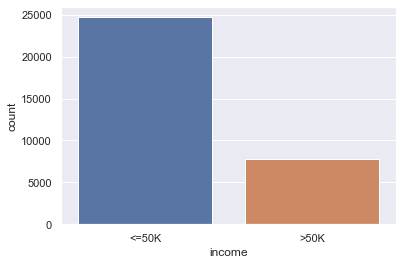

In [11]:
# Count of >50K & <=50K
sns.set_theme(style="darkgrid")
sns.countplot(x="income", data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

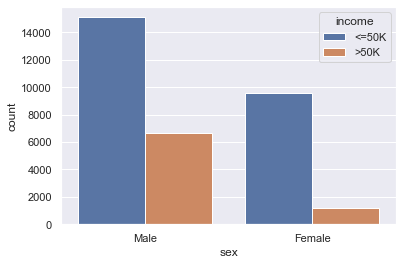

In [12]:
#difference male and female
sns.countplot(x="sex", hue='income', data=data)

<AxesSubplot:xlabel='income', ylabel='count'>

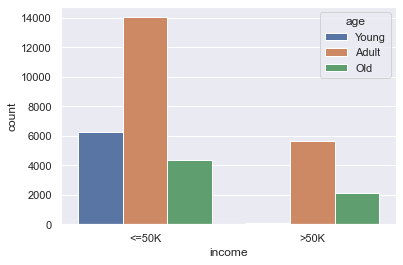

In [13]:
# Alter wird hier durch Young, Adult und Old ersetzt --> macht das Sinn? Zahlen passen doch auch, oder? @Tina
data['age'] = pd.cut(data['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
sns.countplot(x = 'income', hue = 'age', data = data)

<AxesSubplot:xlabel='education-num', ylabel='count'>

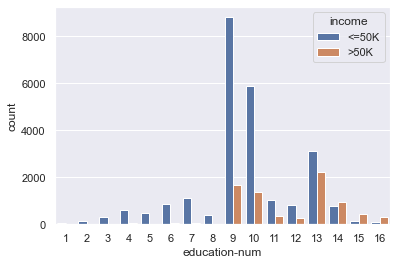

In [14]:
# income in correlation with education years
sns.countplot(x = 'education-num', hue = 'income', data = data)

<AxesSubplot:xlabel='income', ylabel='count'>

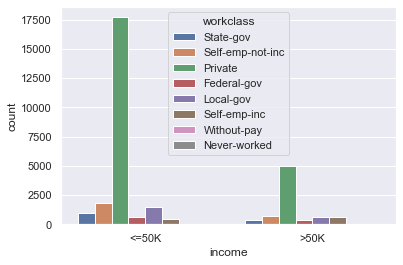

In [15]:
#Plotting workclass corresponding to the income
sns.countplot(x = 'income', hue = 'workclass', data = data)

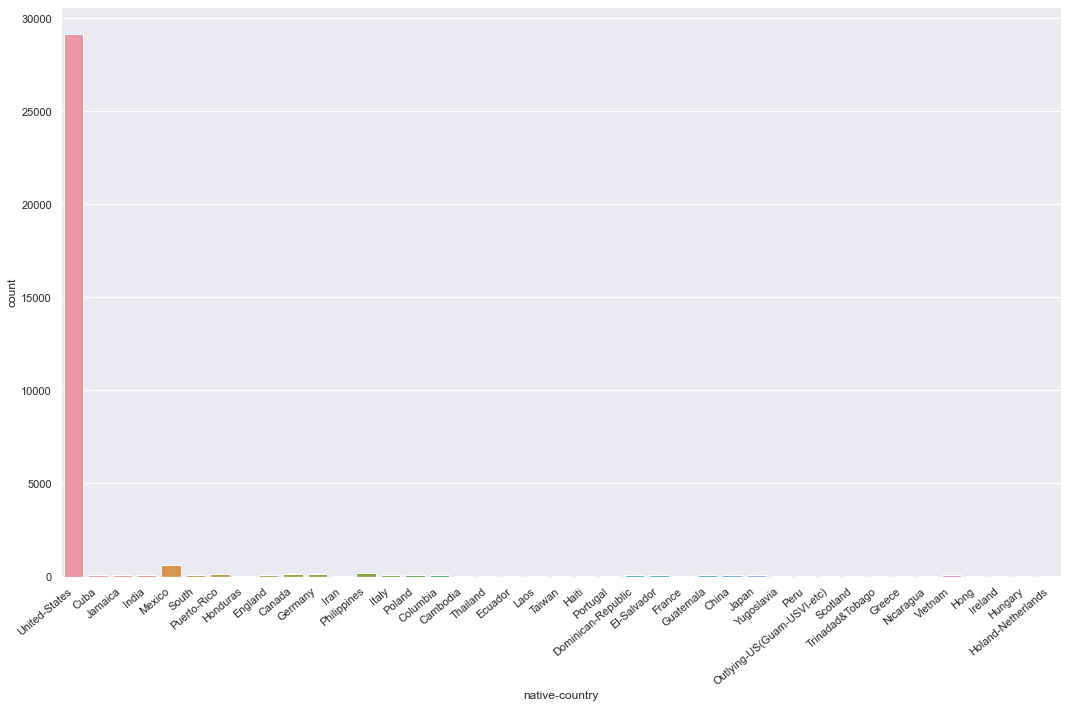

In [16]:
#Plot of Country corresponding to income
# plt.bar(count.index, count.values)
# plt.xlabel('Countries')
# plt.ylabel('Count')
# plt.title('Count from each Country')
plt.figure(figsize=(15,10))
ax = sns.countplot(x = 'native-country', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# preprocess data

In [17]:
# dropping unimportant columns @Tina --> bist du da meiner Meinung? Vielleicht noch Country? ist zu 99% in USA
# fnlwgt is like a id
# capital gain and capital loss are mostly 0
# education can be described by education-num 
data.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'education'], axis=1, inplace=True)

### approach 1 with dropping rows with any na in it

In [18]:
# drop Na 
data_dropped = data.dropna(how='any')
print(data_dropped.isna().sum())
print(data_dropped.shape)

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64
(30139, 11)


In [19]:
# reset index after dropping rows
data_dropped.reset_index(drop=True)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,Adult,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,Adult,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,Adult,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,Old,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,Adult,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
30134,Adult,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30135,Adult,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30136,Old,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30137,Young,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### approach 2 with replacing na values with mode

In [20]:
data.isnull().sum(axis = 0)

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [21]:
print(data['occupation'].describe())
data['occupation'] = data['occupation'].fillna('Prof-specialty')

count              30694
unique                14
top       Prof-specialty
freq                4136
Name: occupation, dtype: object


In [22]:
print(data['workclass'].describe())
data['workclass'] = data['workclass'].fillna('Private')

count       30701
unique          8
top       Private
freq        22673
Name: workclass, dtype: object


In [23]:
print(data['native-country'].describe())
data['native-country'] = data['native-country'].fillna('United-States')

count             31955
unique               41
top       United-States
freq              29153
Name: native-country, dtype: object


In [24]:
data.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

## reformatting approach 1


In [25]:
# Create Married Column - Binary Yes(1) or No(0)
data_dropped["marital-status"] = data_dropped["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data_dropped["marital-status"] = data_dropped["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data_dropped["marital-status"] = data_dropped["marital-status"].map({"Married":1, "Single":0})
data_dropped["marital-status"] = data_dropped["marital-status"].astype(int)

#Since majority of race is white, the rest of races can be combined together to form a new group
data_dropped['race'].unique()
data_dropped['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

# combine all other countries than united states to one class 
countries = np.array(data_dropped['native-country'].unique())
countries = np.delete(countries, 0)
data_dropped['native-country'].replace(countries, 'Other', inplace = True)
data_dropped['native-country'].replace(countries, 'Other', inplace = True)
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,Adult,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,Adult,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,Adult,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,Old,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,Adult,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [26]:
# encoding
# 1 = >50K; 0 = <=50K 
encoder_income = LabelEncoder()
data_dropped['income'] = encoder_income.fit_transform(data_dropped['income'])
encoder_worklass = LabelEncoder()
data_dropped['workclass'] = encoder_worklass.fit_transform(data_dropped['workclass'])
encoder_occupation = LabelEncoder()
data_dropped['occupation'] = encoder_occupation.fit_transform(data_dropped['occupation'])
encoder_relationship = LabelEncoder()
data_dropped['relationship'] = encoder_relationship.fit_transform(data_dropped['relationship'])
encoder_race = LabelEncoder()
data_dropped['race'] = encoder_race.fit_transform(data_dropped['race'])
encoder_sex = LabelEncoder()
data_dropped['sex'] = encoder_sex.fit_transform(data_dropped['sex'])
encoder_nativecountry  = LabelEncoder()
data_dropped['native-country'] = encoder_nativecountry.fit_transform(data_dropped['native-country'])
data_dropped.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,Adult,5,13,0,0,1,1,1,40,1,0
1,Adult,4,13,1,3,0,1,1,13,1,0
2,Adult,2,9,0,5,1,1,1,40,1,0
3,Old,2,7,1,5,0,0,1,40,1,0
4,Adult,2,13,1,9,5,0,0,40,0,0


In [27]:
#Splitting the data set into features and outcome
X = data_dropped.drop(['income'], axis=1)
Y = data_dropped['income']
X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,Adult,5,13,0,0,1,1,1,40,1
1,Adult,4,13,1,3,0,1,1,13,1
2,Adult,2,9,0,5,1,1,1,40,1
3,Old,2,7,1,5,0,0,1,40,1
4,Adult,2,13,1,9,5,0,0,40,0


## encoding approach 2